# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Rešeni

## Načtení dat

> ##### Naimportuju potřebné baličky

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import copy

import torch
import torch.nn.functional as F 
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split

> ##### Načtěme data a podívejme se na ně

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,6


In [4]:
df.shape

(52500, 1025)

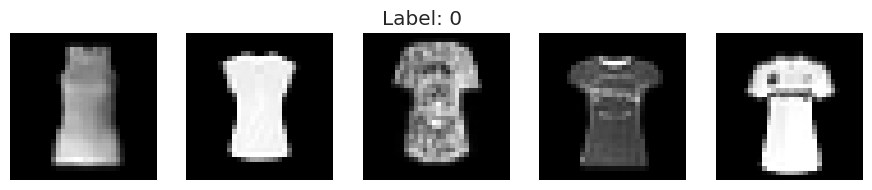

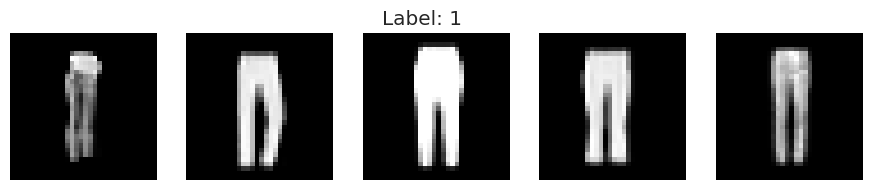

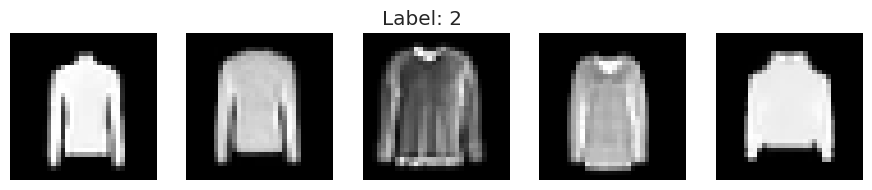

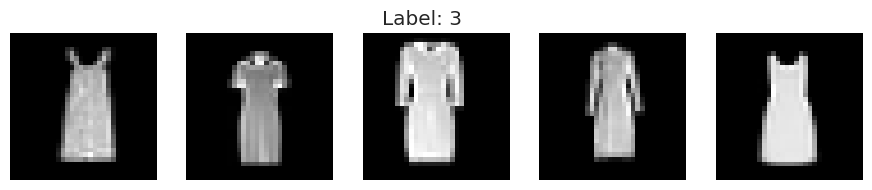

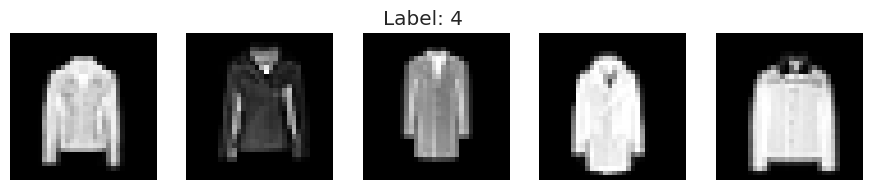

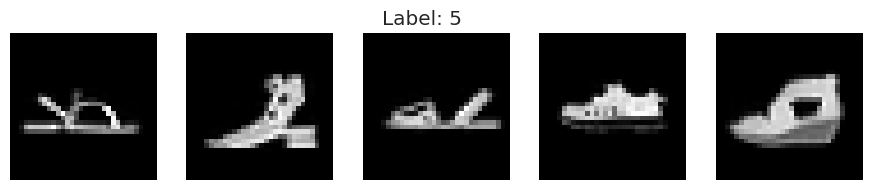

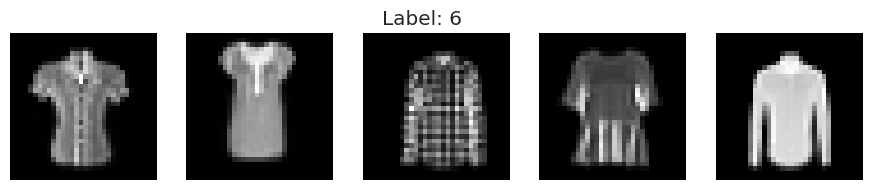

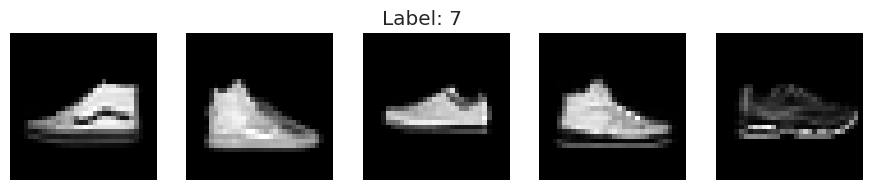

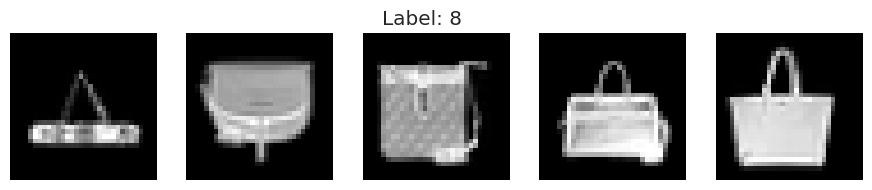

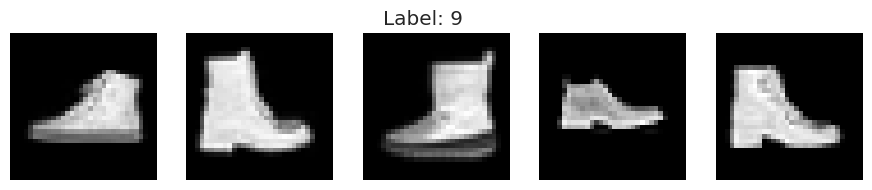

In [5]:
labels = df['label'].unique()
labels.sort()

for label in labels:
    images = df[df['label'] == label].iloc[:5, :1024]

    fig, axs = plt.subplots(1, 5, figsize=(11, 2))

    for img, ax in zip(images.values, axs):
        ax.imshow(img.reshape(32, 32), cmap='gray')
        ax.axis('off')

    plt.suptitle(f"Label: {label}")

> ##### Jak je vidět z obrázků, náš dataset se skládá z oděvů 10 typů.  
> ##### Podle informací o datasetu jsou to:   
0 - Tričko  
1 - Kalhoty  
2 - Svetr  
3 - Šaty  
4 - Kabát  
5 - Sandál  
6 - Košile  
7 - Teniska  
8 - Taška/kabelka  
9 - Kotníková bota  

## Rozdělení dat

> ##### Vytvořím TensorDataset s daty, který rozdělím do tří setů. Ihned použiji normalizaci, protože bez ní dávají modely mnohem horší výsledky. Pro každý ze setů také vytvořím DataLoader

In [6]:
X = torch.tensor(df.drop('label', axis=1).values / 255.0, dtype=torch.float32)  # Normalization
# X = torch.tensor(df.drop('label', axis=1).values, dtype=torch.float32)
y = torch.tensor(df['label'].values, dtype=torch.long)

dataset = TensorDataset(X, y)

generator = torch.Generator().manual_seed(111)

# train = 60% val = 20% test = 20%
n_train = int(len(dataset) * 0.6)
n_val = int(len(dataset) * 0.2)
n_test = len(dataset) - n_train - n_val

train_data, val_data, test_data = random_split(dataset, [n_train, n_val, n_test], generator=generator)

In [7]:
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

> ##### 👆 Po několika experimentech jsem zvolil batch_size = 32 jako nejoptimálnější pro všechny modely.

In [8]:
display(df.shape)
display(len(train_data))
display(len(val_data))
display(len(test_data))

(52500, 1025)

31500

10500

10500

## Model *Dopředná neuronová síť*

💡 Tento model je pro tento typ problému vhodný, protože dokáže pracovat s velkým počtem prvků (v tomto případě obrazových pixelů) a nalézt mezi nimi složité nelineární vztahy. Nezohledňuje však prostorovou strukturu obrazu, což může být nevýhodou.

> ##### Jako trénovací zařízení jsem v tomto případě zvolil procesor, protože tento typ modelu se na něm učí rychleji.

In [9]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

> ##### Vytvořím třídy pro sítě s 1, 2 a 3 skrytými vrstvami, přičemž počet neuronů v každé vrstvě a aktivační funkci budu předávat jako parametr.
> ##### Jako ztrátovou funkci použiji kategoriální křížovou entropii, což znamená, že na poslední vrstvu bude automaticky použita funkce softmax.

In [10]:
class Net1(nn.Module):
    def __init__(self, hidden_neurons, activation_function):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(32*32, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, 10)
        self.activation_function = activation_function

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation_function(self.fc1(x))
        x = self.fc2(x)
        return x

class Net2(nn.Module):
    def __init__(self, hidden_neurons1, hidden_neurons2, activation_function):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(32*32, hidden_neurons1)
        self.fc2 = nn.Linear(hidden_neurons1, hidden_neurons2)
        self.fc3 = nn.Linear(hidden_neurons2, 10)
        self.activation_function = activation_function

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.fc3(x)
        return x

class Net3(nn.Module):
    def __init__(self, hidden_neurons1, hidden_neurons2, hidden_neurons3, activation_function):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(32*32, hidden_neurons1)
        self.fc2 = nn.Linear(hidden_neurons1, hidden_neurons2)
        self.fc3 = nn.Linear(hidden_neurons2, hidden_neurons3)
        self.fc4 = nn.Linear(hidden_neurons3, 10)
        self.activation_function = activation_function

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.fc4(x)
        return x

> ##### Vytvořím funkci pro trénování sítě
> ##### Přitom budu používat early stopping s patience = 3

In [11]:
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs, patience=3):
    early_stopping_counter = 0
    best_val_accuracy = 0.0
    best_model = None

    for epoch in range(num_epochs):
        model.train()  #  přepnutí modelu do trénovacího režimu
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # vynulování gradientů
            optimizer.zero_grad()

            # forward průchod
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # backward průchod a optimalizace
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        model.eval()  # přepnutí modelu do režimu vyhodnocování
        val_accuracy = calculate_accuracy(val_loader, model)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.3f}, Validation Accuracy: {(val_accuracy * 100):.2f}%')

        # Early stopping
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = copy.deepcopy(model.state_dict())
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            print(f'Early stopping counter: {early_stopping_counter} out of {patience}')
            if early_stopping_counter >= patience:
                print('Early stopping')
                model.load_state_dict(best_model)
                break


> ##### Vytvořím funkci pro výpočet přesnosti modelu

In [12]:
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

> ##### Vytvořím instance neuronových sítí s různým počtem skrytých vrstev a neuronů v nich a pro sítě s 1 skrytou vrstvou použiju aktivační funkce RELU, ELU a Sigmoid.
> ##### Jako optimalizér zkusím použít běžný gradientní sestup a Adam

In [13]:
model_1layer_16_relu = Net1(16, F.relu)
model_1layer_64_relu = Net1(64, F.relu)
model_1layer_128_relu = Net1(128, F.relu)

model_1layer_16_elu = Net1(16, F.elu)
model_1layer_64_elu = Net1(64, F.elu)
model_1layer_128_elu = Net1(128, F.elu)

model_1layer_16_sig = Net1(16, torch.sigmoid)
model_1layer_64_sig = Net1(64, torch.sigmoid)
model_1layer_128_sig = Net1(128, torch.sigmoid)

model_2layer_16 = Net2(16, 16, F.relu)
model_2layer_32 = Net2(32, 128, F.relu)
model_2layer_128 = Net2(128, 32, F.relu)

model_3layer_1632 = Net3(16, 32, 64, F.relu)
model_3layer_1664 = Net3(16, 64, 128, F.relu)
model_3layer_6432 = Net3(64, 32, 16, F.relu)


models_dict = {
    'model_1layer_16_relu': model_1layer_16_relu,
    'model_1layer_64_relu': model_1layer_64_relu,
    'model_1layer_128_relu': model_1layer_128_relu,
    'model_1layer_16_elu': model_1layer_16_elu,
    'model_1layer_64_elu': model_1layer_64_elu,
    'model_1layer_128_elu': model_1layer_128_elu,
    'model_1layer_16_sig': model_1layer_16_sig,
    'model_1layer_64_sig': model_1layer_64_sig,
    'model_1layer_128_sig': model_1layer_128_sig,
    'model_2layer_16': model_2layer_16,
    'model_2layer_32': model_2layer_32,
    'model_2layer_128': model_2layer_128,
    'model_3layer_1632': model_3layer_1632,
    'model_3layer_1664': model_3layer_1664,
    'model_3layer_6432': model_3layer_6432
}


optimizers = [torch.optim.SGD, torch.optim.Adam]


results = {}

> ##### Naučím všechny kombinace vytvořených sítí a optimalizátorů

In [14]:
for name, model in models_dict.items():
    for Optimizer in optimizers:
        
        print(f'Model: {name}')
        print(f'Optimizer: {Optimizer.__name__}')
        
        model = model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = Optimizer(model.parameters(), lr=0.001)

        train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
        val_accuracy = calculate_accuracy(val_loader, model)
        test_accuracy = calculate_accuracy(test_loader, model)

        results[(name, Optimizer.__name__)] = (val_accuracy, test_accuracy)
        
        print(f"Validation Accuracy: {val_accuracy * 100:.4f}%, Test Accuracy: {test_accuracy * 100:.4f}%")
        print()


Model: model_1layer_16_relu
Optimizer: SGD
Epoch 1/10, Loss: 2.234, Validation Accuracy: 26.30%
Epoch 2/10, Loss: 2.070, Validation Accuracy: 40.54%
Epoch 3/10, Loss: 1.822, Validation Accuracy: 49.87%
Epoch 4/10, Loss: 1.598, Validation Accuracy: 51.12%
Epoch 5/10, Loss: 1.440, Validation Accuracy: 54.61%
Epoch 6/10, Loss: 1.329, Validation Accuracy: 56.82%
Epoch 7/10, Loss: 1.248, Validation Accuracy: 60.93%
Epoch 8/10, Loss: 1.187, Validation Accuracy: 62.81%
Epoch 9/10, Loss: 1.138, Validation Accuracy: 63.67%
Epoch 10/10, Loss: 1.098, Validation Accuracy: 65.03%
Validation Accuracy: 65.0286%, Test Accuracy: 64.6571%

Model: model_1layer_16_relu
Optimizer: Adam
Epoch 1/10, Loss: 0.827, Validation Accuracy: 74.58%
Epoch 2/10, Loss: 0.684, Validation Accuracy: 76.35%
Epoch 3/10, Loss: 0.642, Validation Accuracy: 77.62%
Epoch 4/10, Loss: 0.621, Validation Accuracy: 77.72%
Epoch 5/10, Loss: 0.602, Validation Accuracy: 78.08%
Epoch 6/10, Loss: 0.587, Validation Accuracy: 78.80%
Epoch 7/

> ##### 👆 Po několika experimentech jsem zvolil krok optimalizátoru = 0,001 jako nejoptimálnější

> ##### Vypíšu nejlepší modely z hlediska přesnosti na validačních datech.

In [15]:
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)

for i in range(10):
    print(f"Model: {sorted_results[i][0][0]}, Optimizer: {sorted_results[i][0][1]}, Validation Accuracy: {round(sorted_results[i][1][0]*100, 2)}%")


Model: model_1layer_128_relu, Optimizer: Adam, Validation Accuracy: 83.52%
Model: model_2layer_128, Optimizer: Adam, Validation Accuracy: 83.47%
Model: model_3layer_6432, Optimizer: Adam, Validation Accuracy: 83.13%
Model: model_1layer_64_relu, Optimizer: Adam, Validation Accuracy: 83.12%
Model: model_1layer_64_elu, Optimizer: Adam, Validation Accuracy: 83.12%
Model: model_2layer_32, Optimizer: Adam, Validation Accuracy: 83.09%
Model: model_1layer_128_sig, Optimizer: Adam, Validation Accuracy: 82.9%
Model: model_1layer_128_elu, Optimizer: Adam, Validation Accuracy: 82.5%
Model: model_1layer_64_sig, Optimizer: Adam, Validation Accuracy: 82.1%
Model: model_3layer_1632, Optimizer: Adam, Validation Accuracy: 81.42%


> ##### 👆 Jak je vidět z výsledků, nejlepším optimalizátorem je v této situaci Adam.
> ##### V seznamu nejlepších sítí je poměrně hodně sítí, které mají pouze 1 skrytou vrstvu.

> ##### Zkoušel jsem také dropout, batch normalization a start-filling parametrů sítě, ale nepřinesly žádné výrazné zlepšení a v některých případech zhoršily výkon sítě.

> ##### Po několika dalších experimentech jsem odvodil takový model jako nejlepší z modelů dopředné neuronové sítě

In [16]:
model_3layer_256_128_100 = Net3(256, 128, 100, F.elu)
Optimizer = torch.optim.Adam

model = model_3layer_256_128_100

print(f'Model: model_3layer_256_128_100')
print(f'Activation: ELU')
print(f'Optimizer: Adam')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Optimizer(model.parameters(), lr=0.001)

train(model, criterion, optimizer, train_loader, val_loader, num_epochs=20)
val_accuracy = calculate_accuracy(val_loader, model)
test_accuracy = calculate_accuracy(test_loader, model)

print(f"Validation Accuracy: {val_accuracy * 100:.4f}%, Test Accuracy: {test_accuracy * 100:.4f}%")
print()

Model: model_3layer_256_128_100
Activation: ELU
Optimizer: Adam
Epoch 1/20, Loss: 0.779, Validation Accuracy: 75.98%
Epoch 2/20, Loss: 0.570, Validation Accuracy: 79.78%
Epoch 3/20, Loss: 0.511, Validation Accuracy: 81.13%
Epoch 4/20, Loss: 0.469, Validation Accuracy: 81.42%
Epoch 5/20, Loss: 0.436, Validation Accuracy: 82.79%
Epoch 6/20, Loss: 0.411, Validation Accuracy: 83.19%
Epoch 7/20, Loss: 0.395, Validation Accuracy: 84.11%
Epoch 8/20, Loss: 0.374, Validation Accuracy: 83.46%
Early stopping counter: 1 out of 3
Epoch 9/20, Loss: 0.355, Validation Accuracy: 83.94%
Early stopping counter: 2 out of 3
Epoch 10/20, Loss: 0.344, Validation Accuracy: 83.98%
Early stopping counter: 3 out of 3
Early stopping
Validation Accuracy: 84.1143%, Test Accuracy: 84.2476%



> ##### 👆 Na validačních i testovacích datech je přesnost přibližně 84 %, což je poměrně dobrý výsledek.

> ##### Vytvořím funkci pro zobrazení obrázků špatně definovaných tříd

In [19]:
def calculate_accuracy_and_show_incorrect_images(loader, model, num_images=25):
    correct = 0
    total = 0
    incorrect_images = []
    incorrect_labels = []
    incorrect_predictions = []
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            mask = (predicted != labels)
            incorrect_images.extend(images[mask])
            incorrect_labels.extend(labels[mask])
            incorrect_predictions.extend(predicted[mask])

    num_cols = 5
    num_rows = 5
    
    plt.figure(figsize=(10, 10))
    
    class_names = {
    0: 'Tričko',
    1: 'Kalhoty',
    2: 'Svetr',
    3: 'Šaty',
    4: 'Kabát',
    5: 'Sandál',
    6: 'Košile',
    7: 'Teniska',
    8: 'Taška/kabelka',
    9: 'Kotníková bota'
    }

    for i in range(num_images):
        image = incorrect_images[i].cpu().numpy().reshape(32, 32)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(image, cmap='gray')
        true_label = class_names[incorrect_labels[i].item()] 
        pred_label = class_names[incorrect_predictions[i].item()]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

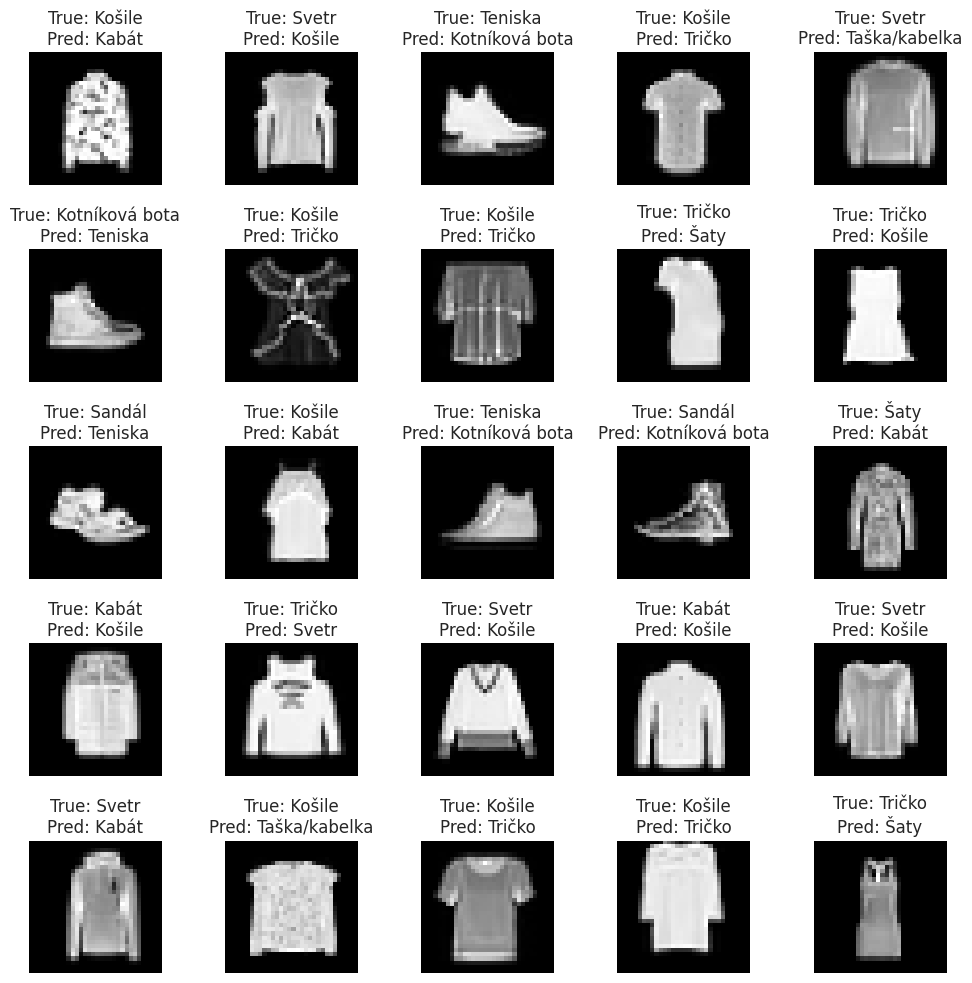

In [18]:
calculate_accuracy_and_show_incorrect_images(test_loader, model)

> ##### 👆 Jak je vidět z obrázků, některé z nich síť identifikuje podivně, například si plete svetr a tašku, ale v jiných případech může být i pro mě jako pro člověka obtížné identifikovat, co je na obrázku, například teniska nebo kotniková bota, košile nebo tričko, svetr nebo kabát atd.

## Model *Konvoluční neuronová síť*

💡 Tento model je vhodný zejména pro zpracování obrazu, protože zohledňuje prostorovou strukturu obrazu. Konvoluční vrstvy jsou schopny detekovat lokální vzory, jako jsou hrany a textury, což je činí velmi efektivními pro úlohy klasifikace obrazu. Díky tomu jsou pro tento typ úloh vhodnější ve srovnání s modely s dopředným šířením.

> ##### U tohoto typu neuronové sítě je pro účely trénování mnohem efektivnější použít grafickou kartu než procesor.

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

> ##### Vytvořím třídy konvolučních sítí s různými kombinacemi parametrů, jako je počet konvolučních a skrytých vrstev, použití poolingu, dropout, batch normalization a early stopping

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*8*8, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  # (batch_size, channels, height, width)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x) 
        x = x.view(-1, 64*8*8)  # (batch_size, features)
        x = self.fc1(x)
        return x


In [ ]:
class CNNWithoutPooling2_3(nn.Module):
    def __init__(self):
        super(CNNWithoutPooling2_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*32*32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32) 
        x = F.relu(self.conv1(x)) 
        x = F.relu(self.conv2(x))
        x = x.view(-1, 64*32*32) 
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x) 
        return x


In [ ]:
class CNNWithPooling2_3(nn.Module):
    def __init__(self):
        super(CNNWithPooling2_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*8*8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32) 
        x = F.relu(self.conv1(x))  
        x = self.pool(x)  
        x = F.relu(self.conv2(x)) 
        x = self.pool(x)  
        x = x.view(-1, 64*8*8)  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        x = self.fc3(x) 
        return x


In [ ]:
class CNNWithoutPooling3_2(nn.Module):
    def __init__(self):
        super(CNNWithoutPooling3_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128*32*32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32) 
        x = F.relu(self.conv1(x))  
        x = F.relu(self.conv2(x))  
        x = F.relu(self.conv3(x)) 
        x = x.view(-1, 128*32*32) 
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)  
        return x


In [ ]:
class CNNWithPooling3_2(nn.Module):
    def __init__(self):
        super(CNNWithPooling3_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128*4*4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.conv1(x))
        x = self.pool(x)  
        x = F.relu(self.conv2(x))  
        x = self.pool(x)  
        x = F.relu(self.conv3(x))  
        x = self.pool(x) 
        x = x.view(-1, 128*4*4)  
        x = F.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x


In [ ]:
class CNNWithPooling5(nn.Module):
    def __init__(self):
        super(CNNWithPooling5, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(512*1*1, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32) 
        x = F.relu(self.conv1(x))  
        x = self.pool(x)  
        x = F.relu(self.conv2(x))  
        x = self.pool(x)  
        x = F.relu(self.conv3(x))  
        x = self.pool(x) 
        x = F.relu(self.conv4(x))  
        x = self.pool(x) 
        x = F.relu(self.conv5(x))  
        x = self.pool(x) 
        x = x.view(-1, 512*1*1)  
        x = self.fc1(x)  
        return x


In [ ]:
class CNNWithPooling5_2(nn.Module):
    def __init__(self):
        super(CNNWithPooling5_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(512*1*1, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.conv1(x))  
        x = self.pool(x) 
        x = F.relu(self.conv2(x))  
        x = self.pool(x)  
        x = F.relu(self.conv3(x))  
        x = self.pool(x)  
        x = F.relu(self.conv4(x))  
        x = self.pool(x)  
        x = F.relu(self.conv5(x))  
        x = self.pool(x)  
        x = x.view(-1, 512*1*1)  
        x = F.relu(self.fc1(x))  
        x = self.fc2(x) 
        return x


In [ ]:
class CNNWithPoolingAndBatchNorm(nn.Module):
    def __init__(self):
        super(CNNWithPoolingAndBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512*1*1, 128)
        self.bn6 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.bn1(self.conv1(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn2(self.conv2(x)))  
        x = self.pool(x) 
        x = F.relu(self.bn3(self.conv3(x)))  
        x = self.pool(x) 
        x = F.relu(self.bn4(self.conv4(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn5(self.conv5(x))) 
        x = self.pool(x)  
        x = x.view(-1, 512*1*1) 
        x = F.relu(self.bn6(self.fc1(x)))  
        x = self.fc2(x)  
        return x


In [ ]:
class CNNWithPoolingAndDropout(nn.Module):
    def __init__(self):
        super(CNNWithPoolingAndDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(512*1*1, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.conv1(x)) 
        x = self.pool(x)  
        x = F.relu(self.conv2(x)) 
        x = self.pool(x) 
        x = F.relu(self.conv3(x)) 
        x = self.pool(x)  
        x = F.relu(self.conv4(x))  
        x = self.pool(x)  
        x = F.relu(self.conv5(x)) 
        x = self.pool(x)  
        x = x.view(-1, 512*1*1) 
        x = F.relu(self.fc1(x))  
        x = self.dropout(x)  
        x = self.fc2(x)  
        return x


In [21]:
class CNNWithPoolingAndBatchNorm5_1(nn.Module):
    def __init__(self):
        super(CNNWithPoolingAndBatchNorm5_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512*1*1, 10)
        self.bn6 = nn.BatchNorm1d(10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.bn1(self.conv1(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn2(self.conv2(x))) 
        x = self.pool(x) 
        x = F.relu(self.bn3(self.conv3(x)))  
        x = self.pool(x) 
        x = F.relu(self.bn4(self.conv4(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn5(self.conv5(x)))  
        x = self.pool(x) 
        x = x.view(-1, 512*1*1) 
        x = self.bn6(self.fc1(x)) 
        return x


In [ ]:
class CNNWithPoolingAndBatchNorm5_1_last(nn.Module):
    def __init__(self):
        super(CNNWithPoolingAndBatchNorm5_1_last, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512*2*2, 10)
        self.bn6 = nn.BatchNorm1d(10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)  
        x = F.relu(self.bn1(self.conv1(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn2(self.conv2(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn3(self.conv3(x))) 
        x = self.pool(x)  
        x = F.relu(self.bn4(self.conv4(x))) 
        x = self.pool(x)  
        x = F.relu(self.bn5(self.conv5(x))) 
        x = x.view(-1, 512*2*2) 
        x = self.bn6(self.fc1(x)) 
        return x


In [ ]:
class CNNWithPoolingAndBatchNorm5_1_last_BNlast(nn.Module):
    def __init__(self):
        super(CNNWithPoolingAndBatchNorm5_1_last_BNlast, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512*2*2, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32) 
        x = F.relu(self.bn1(self.conv1(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn2(self.conv2(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn3(self.conv3(x)))  
        x = self.pool(x)  
        x = F.relu(self.bn4(self.conv4(x))) 
        x = self.pool(x)  
        x = F.relu(self.bn5(self.conv5(x))) 
        x = x.view(-1, 512*2*2)  
        x = self.fc1(x) 
        return x


In [ ]:
class CNNModel4_1(nn.Module):
    def __init__(self):
        super(CNNModel4_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256*4*4, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = x.view(-1, 256*4*4)
        x = self.fc1(x)
        return x


In [ ]:
class CNNModel4_2(nn.Module):
    def __init__(self):
        super(CNNModel4_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256*4*4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = x.view(-1, 256*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


> ##### Parametry budu vybírat "ručně", tak, že nejprve vytvořím několik sítí, podívám se na výsledek a pokusím se zlepšit nejlepší z nich malými změnami parametrů nebo použitím nějakých technik. Tato metoda nemůže dát zaručeně nejlepší výsledek, protože ten by byl dán prohledáním všech kombinací, což by vyžadovalo několik hodin trénování, ale oproti tomu dává dostatečně dobrý výsledek v poměrně krátkém čase

> ##### Jako optimalizátor použiji Adam s krokem 0,001, protože se již velmi dobře ukázal, jako ztrátovou funkci použiji kategoriální křížovou entropii, a jako aktivační funkci RELU.

In [23]:
%%time

# model = SimpleCNN()
# model = CNNWithoutPooling2_3()
# model = CNNWithPooling2_3()
# model = CNNWithoutPooling3_2()
# model = CNNWithPooling3_2()
# model = CNNWithPooling5()
# model = CNNWithPooling5_2()
# model = CNNWithPoolingAndBatchNorm()
# model = CNNWithPoolingAndDropout()
model = CNNWithPoolingAndBatchNorm5_1()
# model = CNNWithPoolingAndBatchNorm5_1_last()
# model = CNNWithPoolingAndBatchNorm5_1_last_BNlast()
# model = CNNModel4_1()
# model = CNNModel4_2()

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train(model, criterion, optimizer, train_loader, val_loader, num_epochs=20)
val_accuracy = calculate_accuracy(val_loader, model)
test_accuracy = calculate_accuracy(test_loader, model)

print(f"Validation Accuracy: {val_accuracy * 100:.4f}%, Test Accuracy: {test_accuracy * 100:.4f}%")
print()


Epoch 1/20, Loss: 0.721, Validation Accuracy: 86.13%
Epoch 2/20, Loss: 0.491, Validation Accuracy: 85.50%
Early stopping counter: 1 out of 3
Epoch 3/20, Loss: 0.414, Validation Accuracy: 87.16%
Epoch 4/20, Loss: 0.354, Validation Accuracy: 87.31%
Epoch 5/20, Loss: 0.318, Validation Accuracy: 88.13%
Epoch 6/20, Loss: 0.285, Validation Accuracy: 87.92%
Early stopping counter: 1 out of 3
Epoch 7/20, Loss: 0.242, Validation Accuracy: 87.91%
Early stopping counter: 2 out of 3
Epoch 8/20, Loss: 0.215, Validation Accuracy: 89.72%
Epoch 9/20, Loss: 0.183, Validation Accuracy: 88.88%
Early stopping counter: 1 out of 3
Epoch 10/20, Loss: 0.159, Validation Accuracy: 89.95%
Epoch 11/20, Loss: 0.137, Validation Accuracy: 90.03%
Epoch 12/20, Loss: 0.115, Validation Accuracy: 89.28%
Early stopping counter: 1 out of 3
Epoch 13/20, Loss: 0.100, Validation Accuracy: 89.76%
Early stopping counter: 2 out of 3
Epoch 14/20, Loss: 0.088, Validation Accuracy: 89.79%
Early stopping counter: 3 out of 3
Early st

> ##### Každý model jsem trénoval po 7, 20 epochách a pak s použitím early stopping a na validačních datech jsem získal takové výsledky:

Model - 7 epochs - 20 epochs - early stopping

2 Conv+pooling+ELU activation - 86%  
2 Conv + 3 FC - 87%  
2 Conv + 3 FC + pooling - 86.8  
3 Conv + 2 FC - 87%  
3 Conv + 2 FC + pooling - 87.5%  
5 Conv + pooling - 88.4%  
5 Conv + pooling + 2 FC - 86.9%  
5 Conv + pooling + Dropout + 2 FC- 87.9%  
5 Conv + pooling + BN + 2 FC - 89.1%  - 89.3%  
5 Conv + pooling + BN(f) - 89.1%  -  89.8%  -  90%  - BEST  
5 Conv + pooling(-1) + BN(f) - 88.9%  - 88.9  
5 Conv + pooling(-1) + BN - 87.6% - 89.7%  -  89.5%  
4 Conv + pooling(-1) + BN - 89.2% - 88.4%  
4 Conv + pooling(-1) + BN + 2 FC - 88%  


> ##### 👆 Jako nejlepší model se ukázala síť s 5 konvolučními vrstvami a 1 skrytou vrstvou, která používá max pooling po každé konvoluční vrstvě a batch normalization po každé vrstvě včetně skryté vrstvy. Na validačních datech je jeho přesnost 90%, což je dobrý výsledek a podle očekávání lepší než model dopředné sítě.

> ##### Zobrazím obrázký špatně definovaných tříd

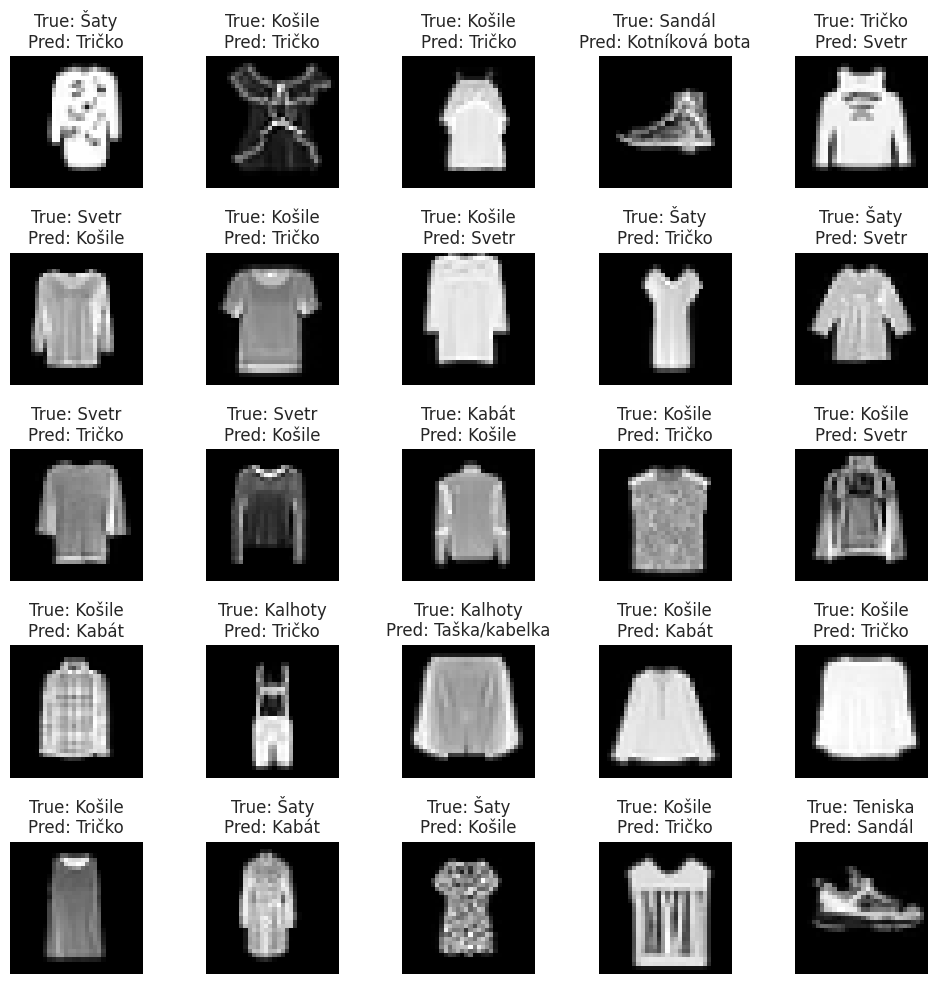

In [24]:
calculate_accuracy_and_show_incorrect_images(test_loader, model)

> ##### 👆 Jak je vidět z obrázků, model se mýlí i v klasifikaci typů oblečení, které by i pro člověka byly obtížně rozlišitelné.

## Finalní model

> ##### Jako finální model jsem se rozhodl použít model s 5 konvolučními vrstvami a 1 skrytou vrstvou, která používá max pooling po každé konvoluční vrstvě a batch normalization po každé vrstvě včetně skryté vrstvy

Přesnost na datech, která model nikdy neviděl, tj. na testovacích datech, lze odhadnout jako 0.906≈ 0.91, což je dobrý výsledek.

## Evaluace

> ##### Načteme dataset evaluate

In [25]:
df_eval = pd.read_csv("evaluate.csv")

> ##### Odstraním příznak ID

In [29]:
X_df_eval = df_eval.drop('ID', axis=1)

> ##### Udělám normalizaci a vytvořím DataLoader

In [31]:
X_eval = torch.tensor(X_df_eval.values / 255.0, dtype=torch.float32)
eval_loader = DataLoader(TensorDataset(X_eval), batch_size=batch_size, shuffle=False)

> ##### Udělám predikci pro dataset evaluate a výsledky uložím do souboru results.csv

In [32]:
predictions = []
model.eval()

with torch.no_grad():
    for data in eval_loader:
        images = data[0].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

results = pd.DataFrame({'ID': range(len(predictions)), 'label': predictions})

results.to_csv('results.csv', index=False)

### Konec :)